想象这样一个例子，在订票系统里有始发地，和目的地，这两个地址即使是同一个地名，我们也希望能够进行区分，比如始发地是上海，目的地是北京，而回程则是始发地是北京，目的地是上海，我们根据一个人的语音，希望系统能够自动识别出始发地、目的地和具体的时间，另外，还希望将返程也能够一起订上。这样的情况，我们使用NN是无法实现了，使用Conv1D倒是可以处理，这里我们介绍另外一种深度学习网络RNN。

传统的语言模型中我们会使用one-hot编码，和n-gram来表示词向量，我们也知道单纯地使用one-hot编码只能表示单个单词，而无关探索句子中的上下文关系的，也就是无法明白句子所要表达的意思的，也就无法比较诸如相关性，关联性等情况。而且另一个很大的问题，就是当语料库很大时，使用one-hot编码的词向量维度也会很大。

除了one-hot编码，还可以使用word hashing，这种表示方式，能够表示语料库中没有的单词。

对于上面的例子，假设我们输入始发地，要求输出目的地，对于一句话来说，除了始发地和目的地的单独表示，而时间单独表示，其它单词就标记为其它，这样整个语料库就很小。

RNN中的隐性状态会被下一次的新输入序列产生的值给覆盖掉，而像LSTM、GRU这样的网络，它能够继承每个batch_size大小中每个样本训练产生的值，直到epochs结束。所以在需要记忆类的文本处理时，一般都默认使用LSTM等，而很少使用RNN了。为什么会如此，也是因为RNN这种网络架构，它只负责对前层的输入向后进行传递，并没有实际用于保存的变量，所以对于下一次的新的输入也就被覆盖掉了。

RNN输入的是一个词向量，输出的则是一个语料库大小的概率分布。

RNN也可以构建的很深，就是纵向拉长，横向拉伸... 对于DRNN来说，一般可分为两种形态，一种是中间各层还是会传递隐层的信息，而另一种只传递前层的输出作为下一个输入。

Bidirectional RNN这样的网络会有双向关联，一般在需要上下文关联的任务中会用到。

对于RNN这样的网络，随着序列的不断拉伸会存在存储容量的问题，另外，实际情况是由于RNN会存在梯度消失，和梯度爆炸问题，这样的网络在使用sigmoid、tanh这样的激活函数，就会出现，而对于relu这样的激活函数，就会出现梯度爆炸，这就使得人们进一步探索，研究出了LSTM这样的可控记忆的网络，能够实现长的短期记忆网络。

LSTM总共有三个门，一个输入门，控制输入信息，一个遗忘门，控制隐状态信息的，一个输入门，控制信息的输出的。

之前说到，RNN使用的梯度下降方法，只不过因为引入了时间维度，叫做基于时间的反向传播算法。

正是因为RNN可能出现的梯度爆炸和梯度消失问题，RNN效果也不那么好。

对于梯度爆炸问题，我们可以使用梯度截断和batchnormalization方法...

而对于梯度消失问题，这个问题似乎要使用LSTM这类的网络了...

LSTM能够解决梯度消失问题的关键在于进入对内存信息的控制，使得前面的输入信息不会因为长期依赖问题而消失。所以说LSTM的遗忘门一般是保持常开的，关闭的话，前面的信息就会被抹去。

对于序列问题的处理，我们有序列到类别，序列到序列。序列到类别的有情感分析，再如机器翻译中的前部分输入序列，不需要每次都要输出，只要一个最终输出即可；序列到序列，就是机器翻译的整个过程，或者说输入文字，输出图像，聊天机器人等应用。

对于像机器翻译这类的应用，一般都是使用的自编码器，而自编码器的使用的RNN，可以任选。比如输入视频、图像序列，输出对其的识别描述。

对于LSTM模型，同样存在着记忆过剩问题，有些任务，只需要获取其中的小部分信息，比如问答问题，读取一篇文章，然后提问、回答，这种应用我们可以引入注意力机制，现在注意力机制就如同电脑中的内存，不仅可以按需读取，还可以进行写入。

我们将RNN与传统的如HMM等进行比较：

* simpleRNN不能顾全到全部序列的信息，但使用Bidirectional RNN是可以的，而HMM中的Viterbi算法是考虑全部序列的；
* RNN等循环网络的损失不总是相关，HMM等是能够考虑标签依赖关系的，但是我们使用DRNN，就能够解决很多的问题，深度RNN，横向考虑的是时间维度，而纵向是空间维度，也就是说尽量挖掘出当前时间的特征，所以现在的语言模型很多已经开始使用RNN替代HMM等传统模型了。
* 或者我们对两者进行集成，前部分使用HMM等，后面使用RNN等

其实，我们在使用RNN时，每个词向量的输出得到的概率，就相当于使用HMM中条件概率。

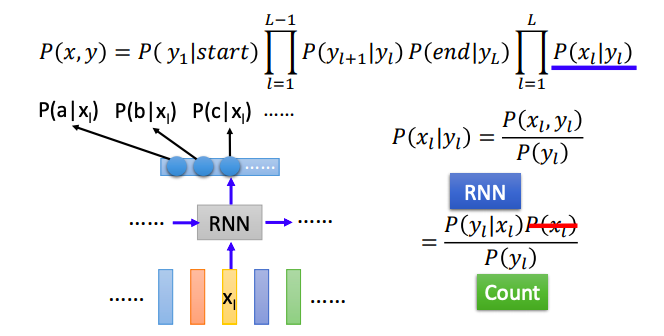

同时，我们还可以使用GAN，GAN中的结构也是任意的...